# Import the necessary Libraries

In [1]:
# Import All the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# importing the libaries required for ML Analysis 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Reading and Understanding The Data

In [2]:
# Read the data 
df = pd.read_csv("day.csv")

In [3]:
# Checking the head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Descriptions of the Columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking the shape of the data
df.shape

(730, 16)

In [6]:
# Getting info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Cleaning The  Dataset

In [7]:
# Checking for Null Values
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## So, there is no Null values present in the Dataset.

In [8]:
# Cleaning and drpping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
df.drop(['instant','dteday','casual','registered'],axis =1,inplace= True)

In [9]:
# Checking the unique values for 'mnth' column
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
# Mapping the 'mnth' column
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [11]:
# Checking the unique values for 'season' column
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
# Mapping the 'season' column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
# Checking the unique values for 'season' column
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [14]:
# Mapping the 'weekday' column
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
# Checking the unique values for 'season' column
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [16]:
# Mapping the 'weathersit' column
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
# Check the head of the data again
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Checking the info about the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# EDA 

# Analysing the categorical columns

In [19]:
# Creating the barplots of the categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df, hue='yr',palette='Set1')
    plt.legend(title='Year',labels=['2018', '2019'])
    plt.show()

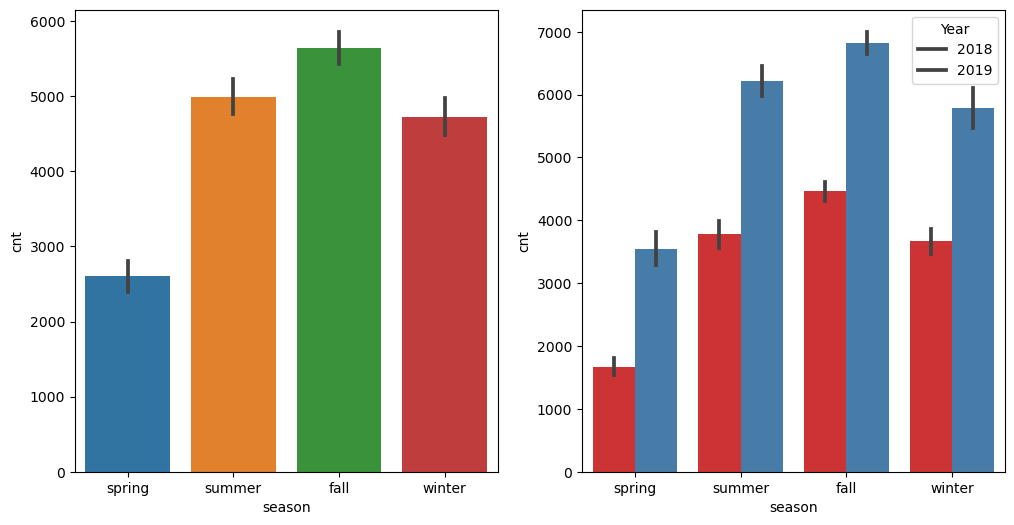

In [20]:
# Creating barplot for 'season ' column
plot_cat_columns('season')

1. From the above bar plot between season and the target column 'cnt' it is very clear that the uses of BoomBikes increases inthe fall season.
2. From the above bar plot we also can see that the fall season of 2019 has the highest growth in terms of uses of BoomBikes and in each season the booking count has increased drastically from 2018 to 2019.

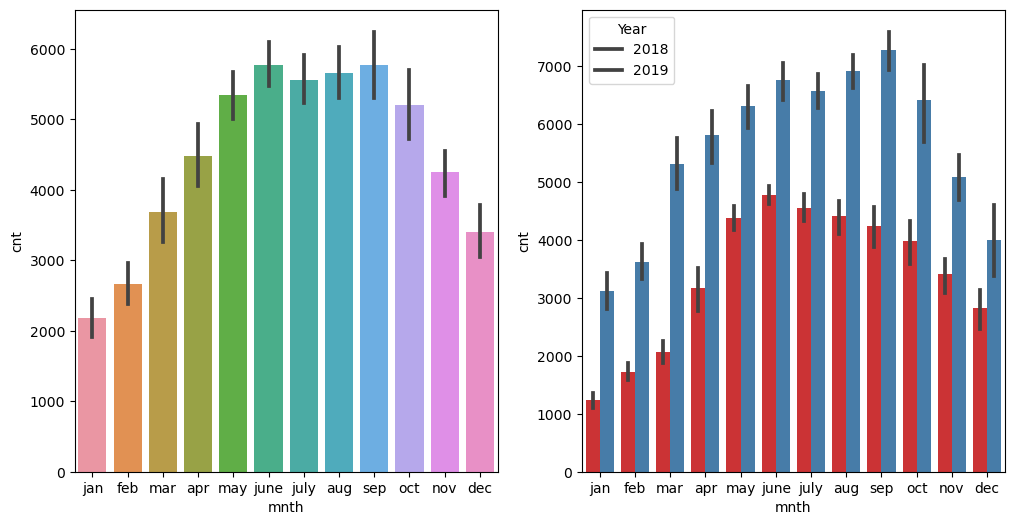

In [21]:
# Creating barplot for 'mnth ' column
plot_cat_columns('mnth')

From the above plot it is clear that most of the bookings has been done during the month of june, july, aug and sep.The trend showed a gradual increase from the beginning of the year until mid-year, after which it started to decline as the year approached its end and the number of bookings for each month seems to have increased from 2018 to 2019.

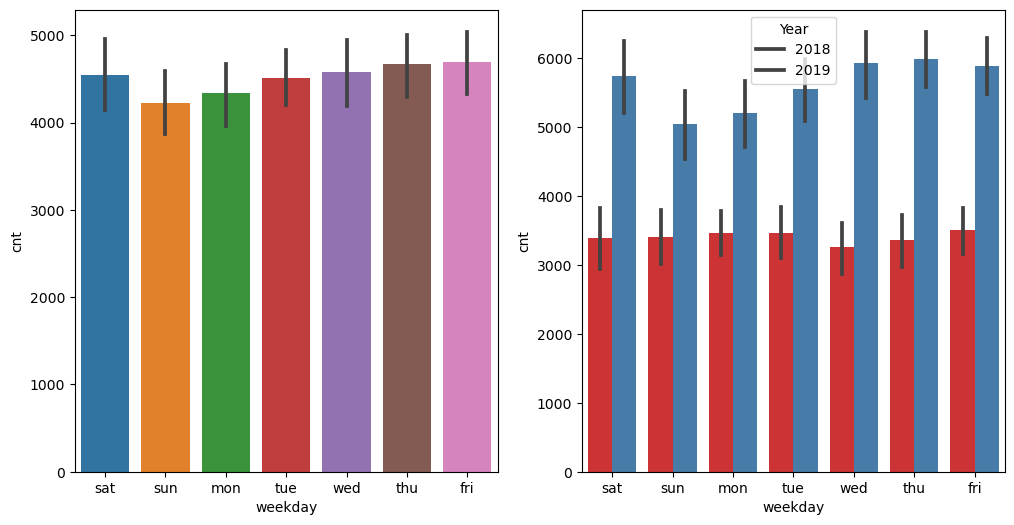

In [22]:
# Creating barplot for 'weekday ' column
plot_cat_columns('weekday')

Here from the above plot it is clear that as compared to the starting of the week Thu,Fri,Sat and Sun have higher number of bookings.

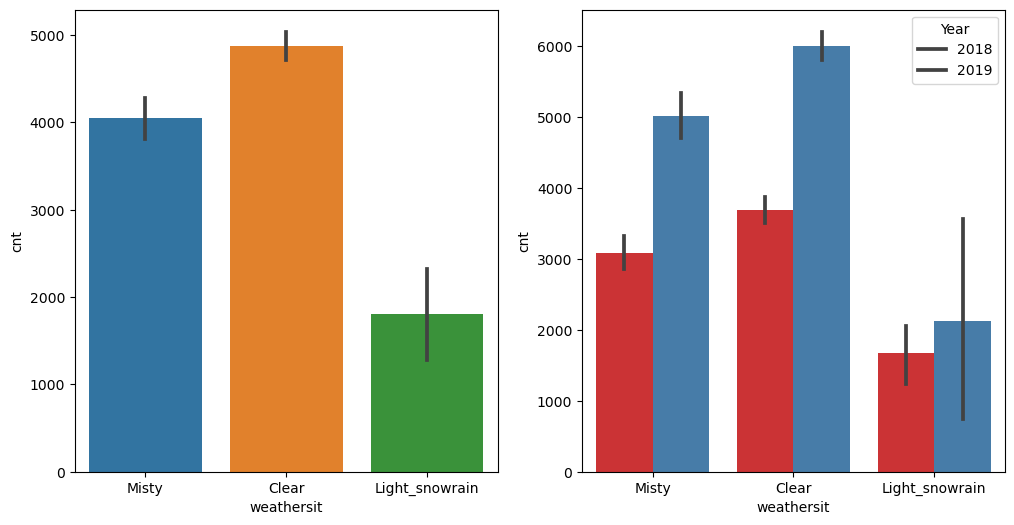

In [23]:
# Creating barplot for 'weathersit ' column
plot_cat_columns('weathersit')

From the above barplots it is clear that most of the customers prefers clear weather for booking of BoomBikes and compared to 2018 booking increased for each weather situation in 2019.

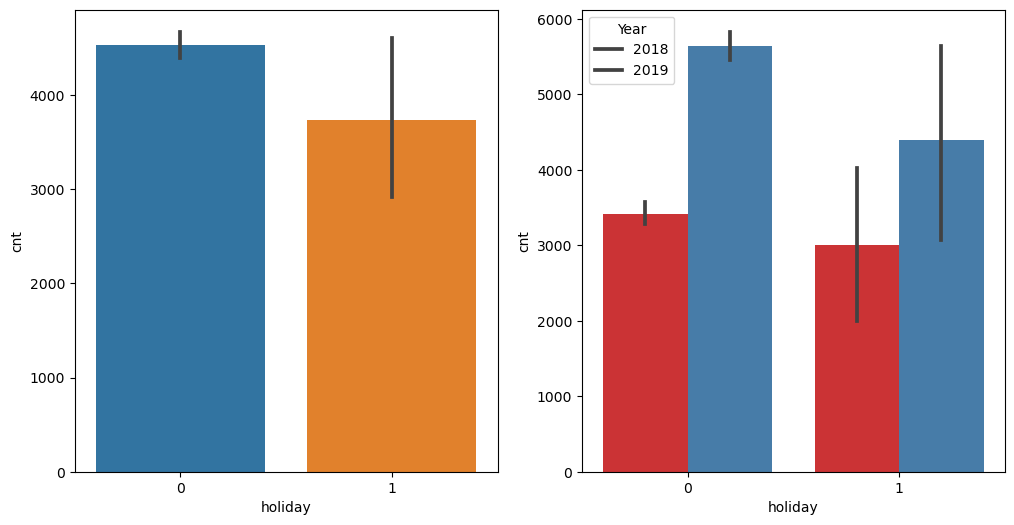

In [24]:
# Creating barplot for 'holiday ' column
plot_cat_columns('holiday')

From the above barplot we can see when its not holiday, booking seems to be less in number.

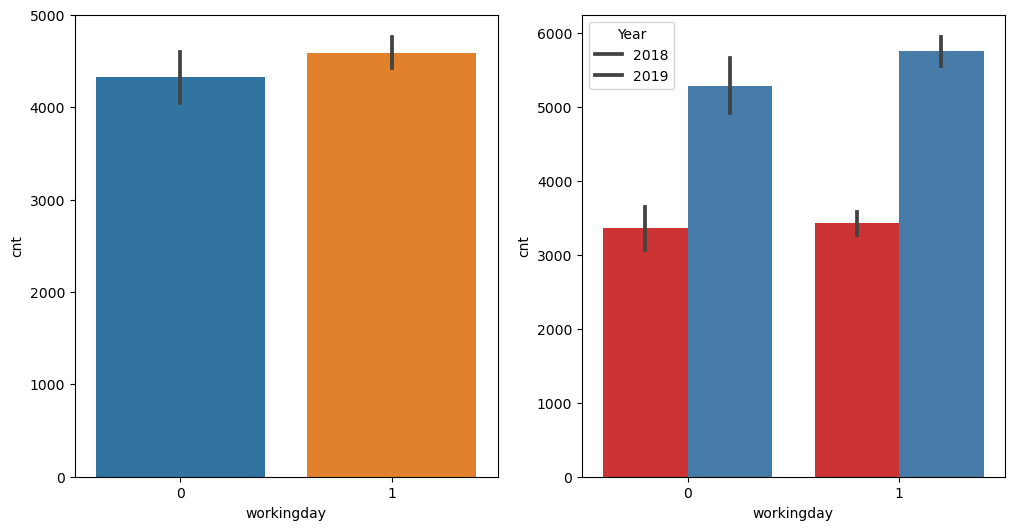

In [25]:
# Creating barplot for 'workingday ' column
plot_cat_columns('workingday')

From the above plot it is clear that the number of bookings remained relatively consistent whether it was a working day or a non-working day. However, there was an overall increase in bookings from 2018 to 2019.

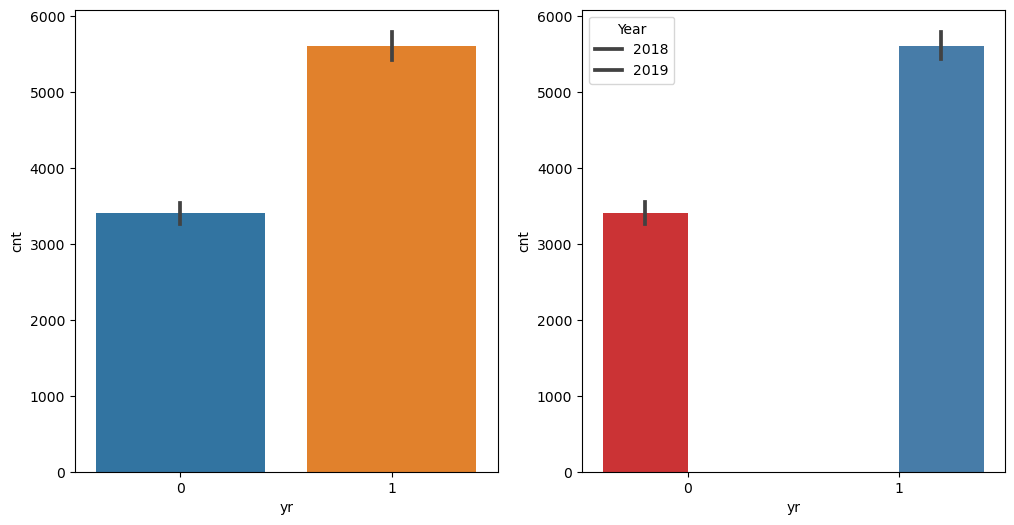

In [26]:
# Creating barplot for 'yr ' column
plot_cat_columns('yr')

In 2019, there was a noticeable rise in bookings compared to 2018,which shows good progress in terms of business.

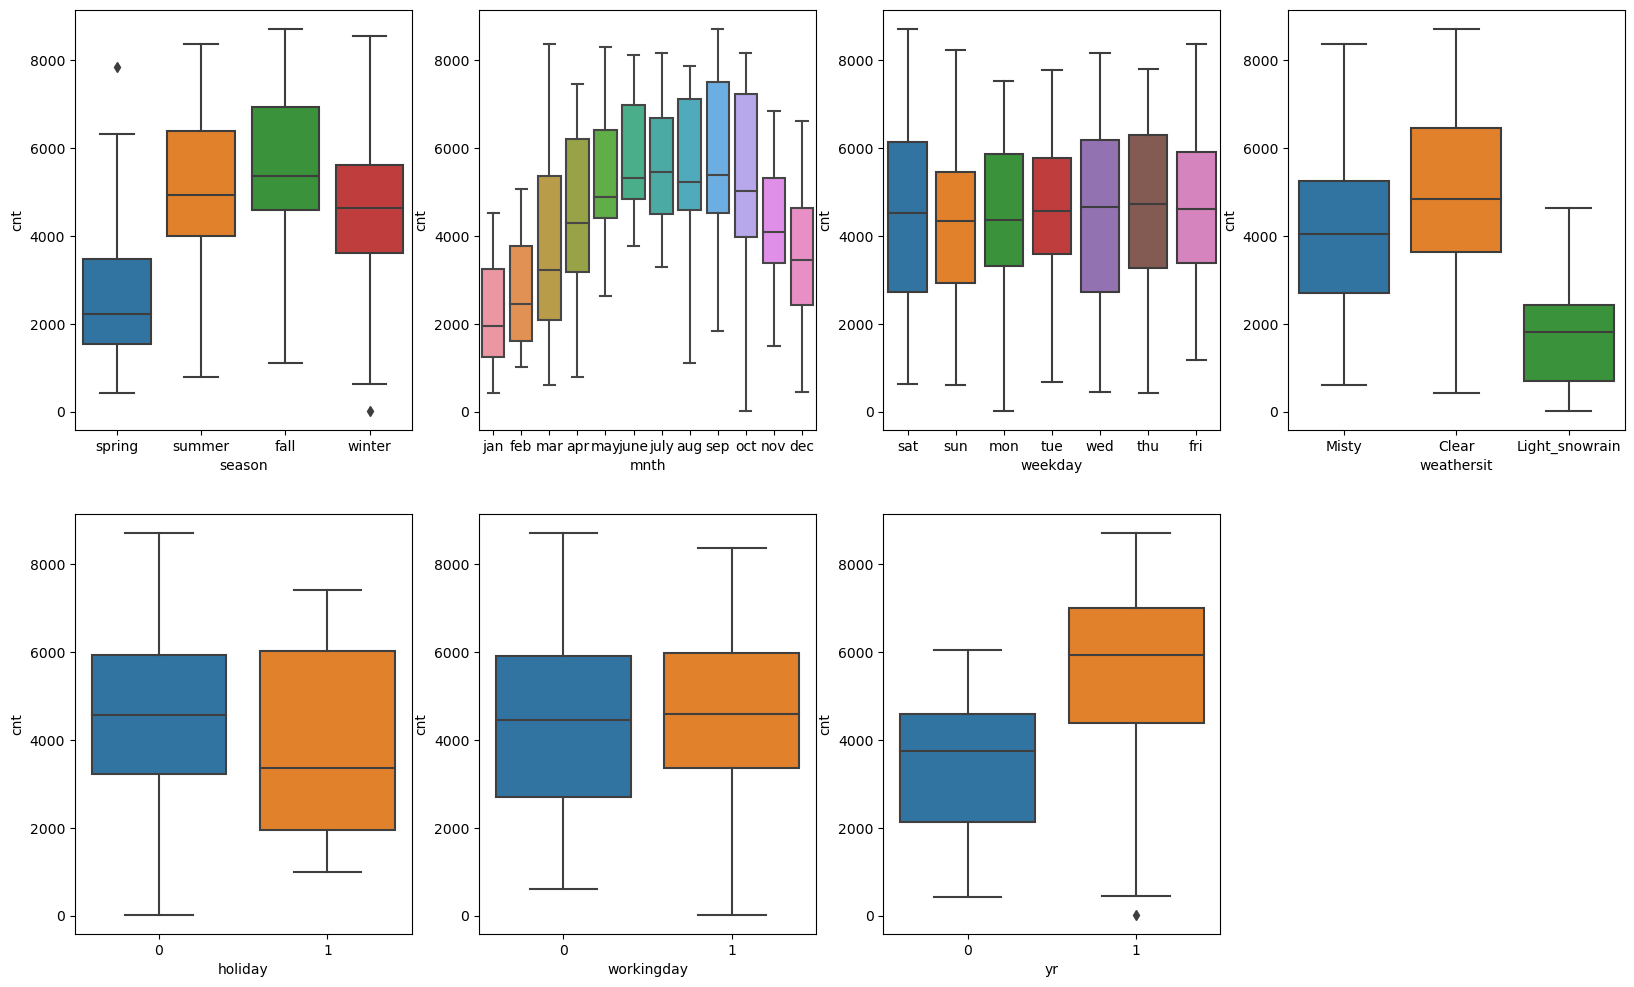

In [27]:
# Creating Boxplots for the categorical Columns
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.show()

# Analysing The numerical columns

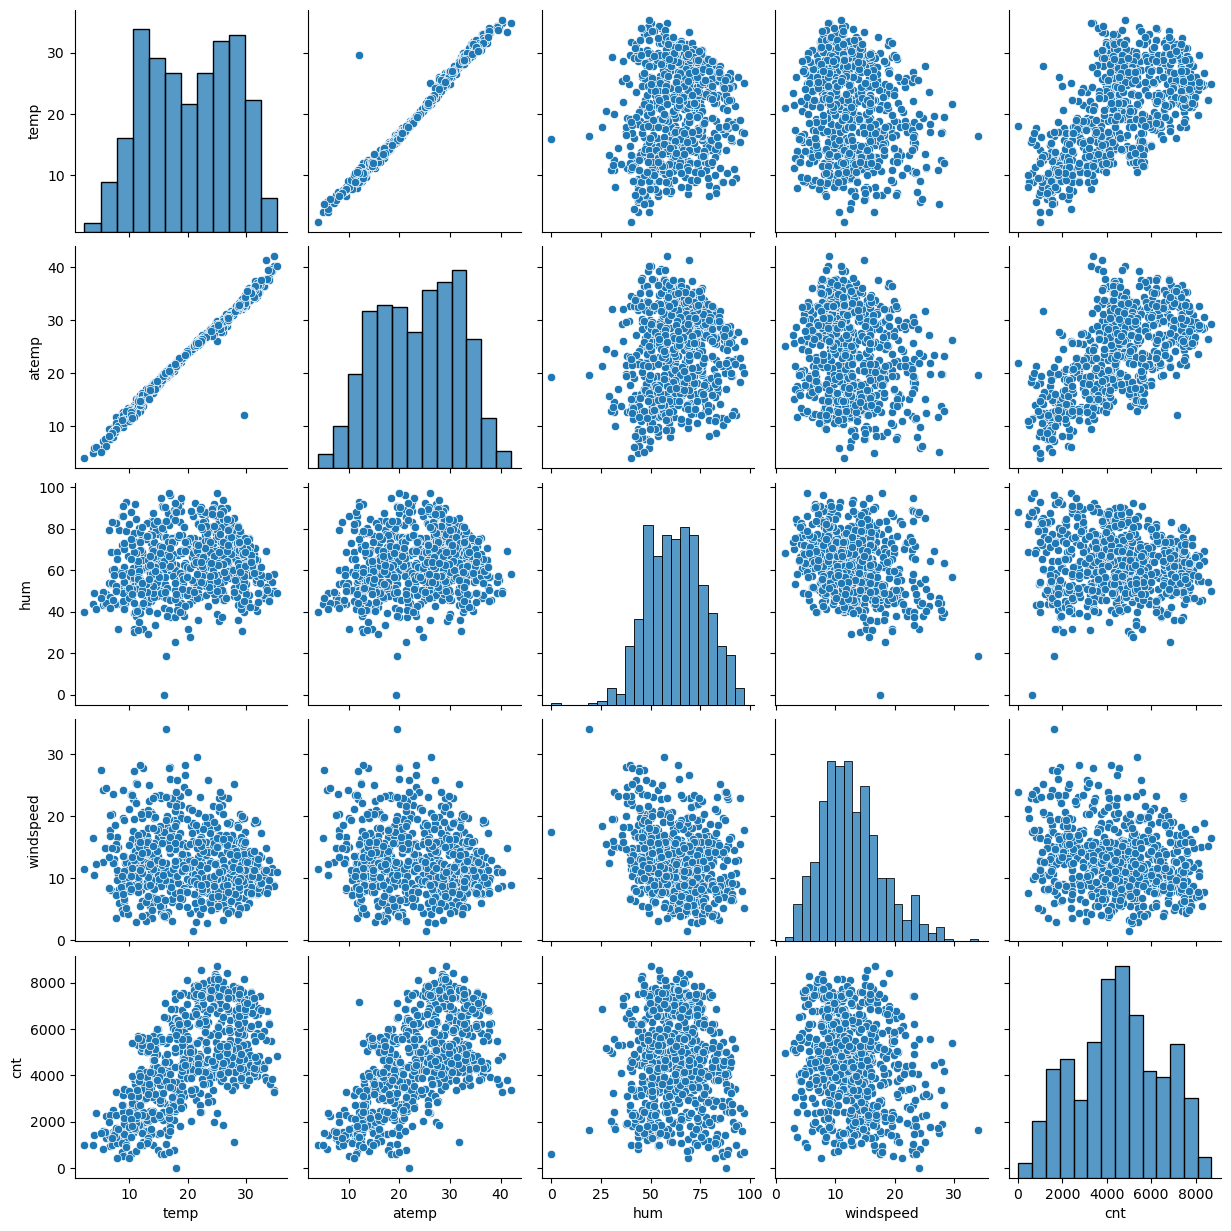

In [28]:
# Creating pairplot for the numerical columns
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

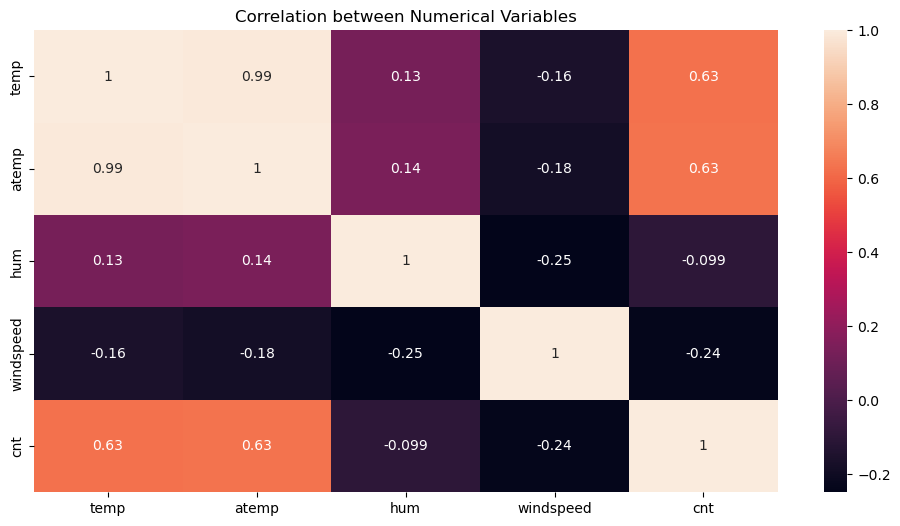

In [29]:
# Creating the heatmap to checking the correlation between numerical variables
plt.figure(figsize=(12,6))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

Here from the above Heatmap we can see there is a relationship between the varaiables 'temp' and 'atemp'. So we can not use both the parameters in model building due to multicolinearity.We will assess which parameter to keep based on VIF and p-values.

# Regression Plots

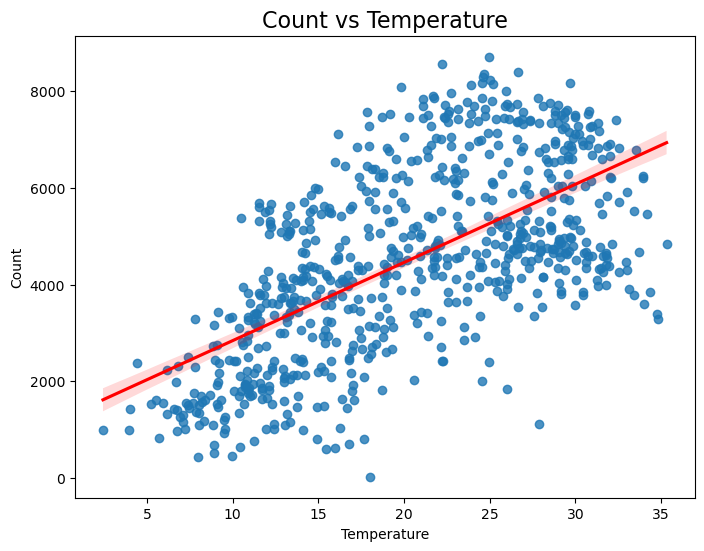

In [30]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Count vs Temperature", fontsize=16)
sns.regplot(df, y="cnt", x="temp",line_kws={'color':'red'})
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

Demand for bikes is positively correlated to temp and we can see that cnt is linearly increasing with temp indicating linear relation.

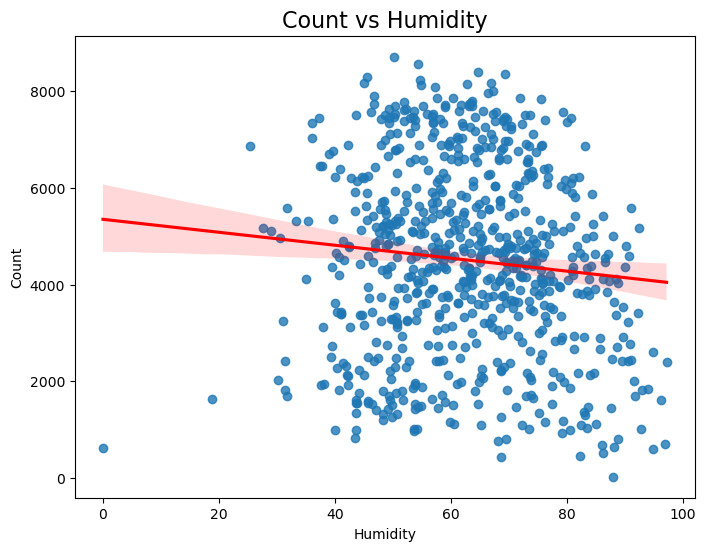

In [31]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Count vs Humidity", fontsize=16)
sns.regplot(df, y="cnt", x="hum",line_kws={'color':'red'})
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

Hum is values are more scattered around and we can see cnt decreasing with increase in humidity.

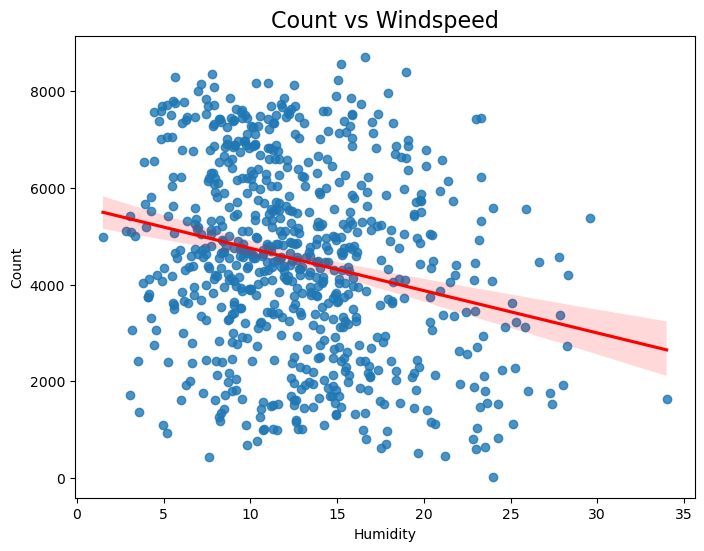

In [32]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Count vs Windspeed", fontsize=16)
sns.regplot(df, y="cnt", x="windspeed",line_kws={'color':'red'})
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

Windspeed is values are more scattered around and we can see cnt decreasing with increase in windspeed.

# Data Preparation for Modelling

In [33]:
# Creating Dummy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [34]:
# Merging  the dataframe, with the dummy variables. 

df = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [36]:
# dropping unnecessary columns as we have already created dummy variable.

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
# Checking the head of new dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [38]:
# Checking the info about the columns of new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Splitting the Dataset into Train & Test Data

In [39]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [40]:
# Check the shape of training datatset
df_train.shape

(510, 30)

In [41]:
# Check the shape of testing datatset
df_test.shape

(220, 30)

# Scaling The Dataset

In [42]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [43]:
# verifying the head of dataset before scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
# verifying the head after appying scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [46]:
# Building the Linear Model
y_train = df_train['cnt']
X_train = df_train.drop(['cnt'],axis=1)

In [47]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [49]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [50]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [51]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [52]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


# Building Linear Model

# Model 1

In [54]:
# Build the 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.22e-191
Time:                        18:51:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [55]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


# Model 2

In [56]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.60e-188
Time:                        18:51:59   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [57]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,yr,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


Dropping a few variables did not significantly impact the VIF (Variance Inflation Factor) values.Lets proceed more to observe better model.

# Model 3

In [58]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.68e-189
Time:                        18:52:10   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [59]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,yr,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


# Model 4

In [60]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          7.12e-189
Time:                        18:52:26   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [61]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,yr,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


# Model 5

In [62]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.42e-188
Time:                        18:52:35   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

 Here we can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
 The F-statistic value is 233.6 which is significantly greater than 1 and the p-value is 1.42e-188 which is almost equal to 0, indicating that the overall model is significant. 

# Residual Analysis

In [63]:
X_train_lm_5

,const,yr,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,0,1,0


In [64]:
y_train_pred = lr_5.predict(X_train_lm_5)

# Checking the Normality of Error Terms

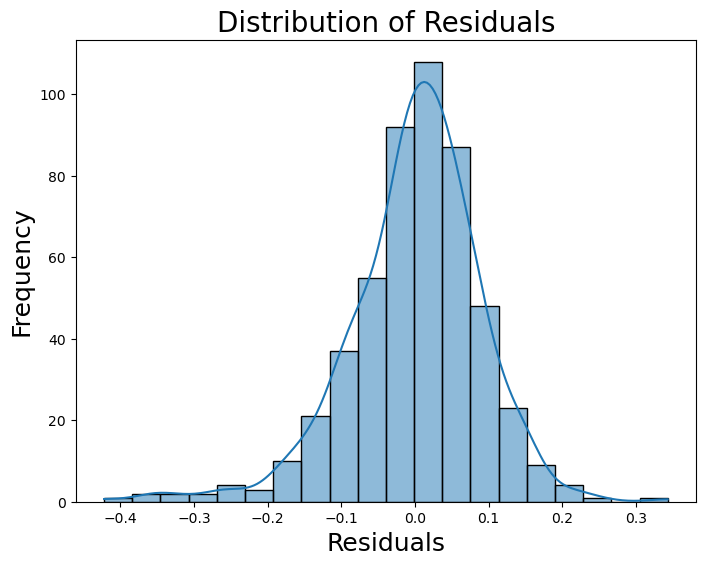

In [65]:
# Plot the histogram of residuals (Error terms)
plt.figure(figsize=(8, 6))
sns.histplot(y_train - y_train_pred, bins=20, kde=True)
plt.title('Distribution of Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

# Multicolinearity

In [66]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,yr,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


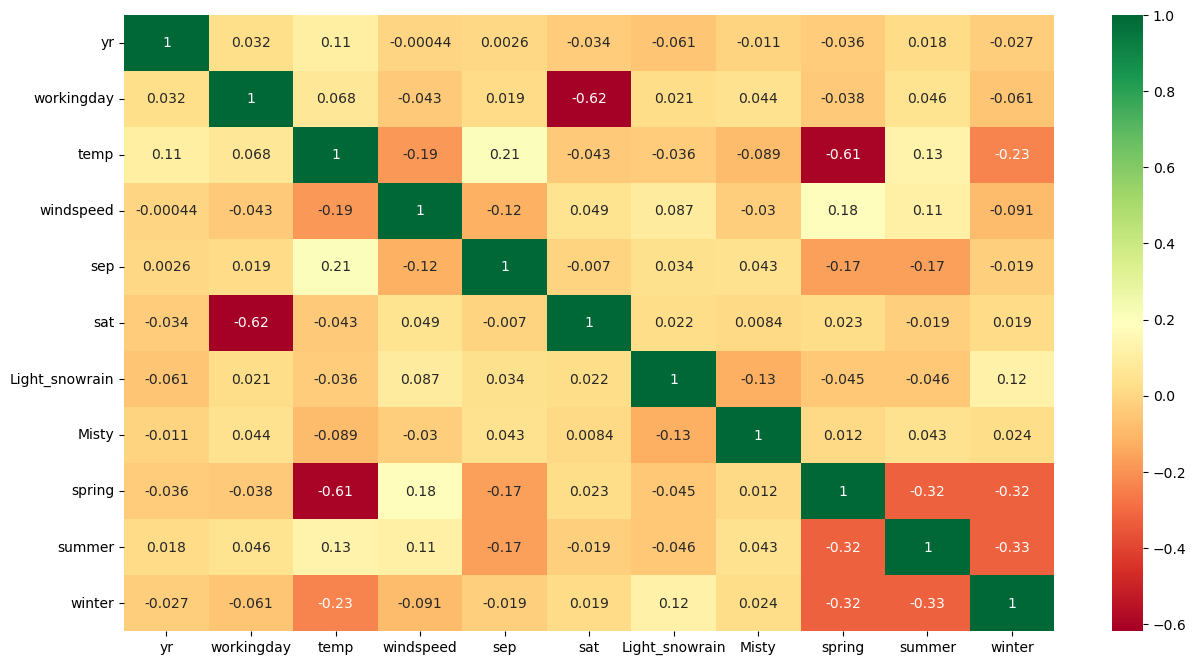

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

Here we can see the VIF values are less than 5 and from the Heatmap it is clear that there is no multicolinearity.

# Linearity

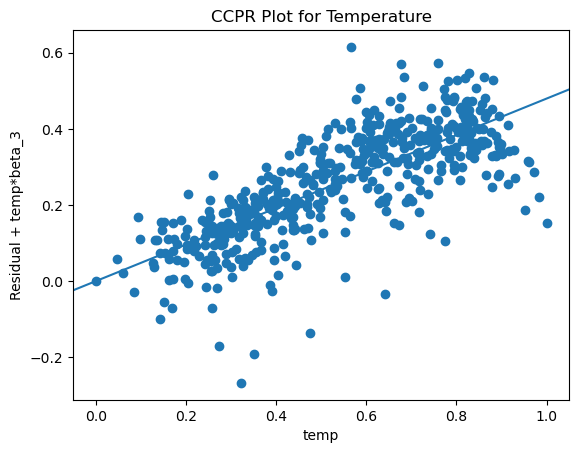

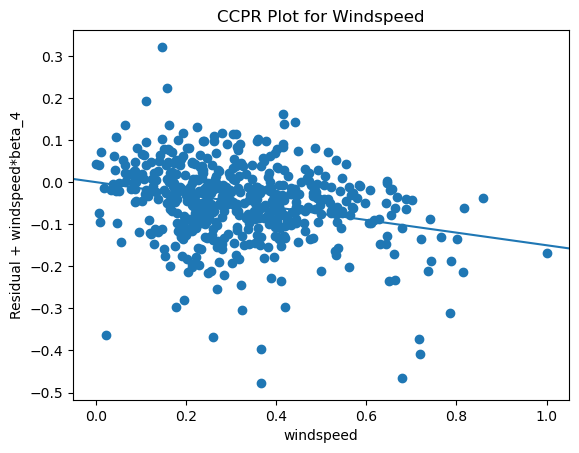

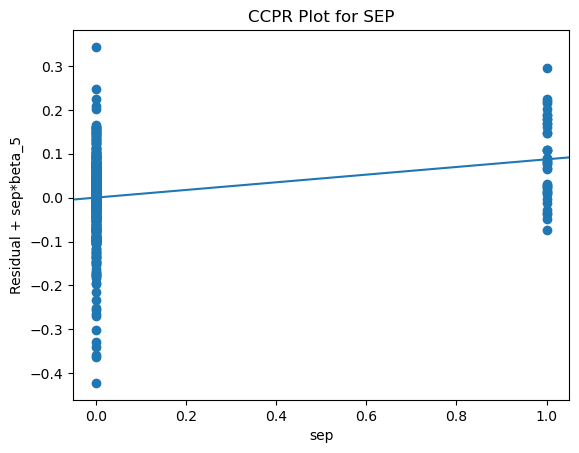

In [68]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.title('CCPR Plot for Temperature')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.title('CCPR Plot for Windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.title('CCPR Plot for SEP')
plt.show()


From the above visualizations we can observe the linearity between the selected features ('temp', 'sep', 'windspeed') and the target variable 'cnt'.

## Homoscedasticity

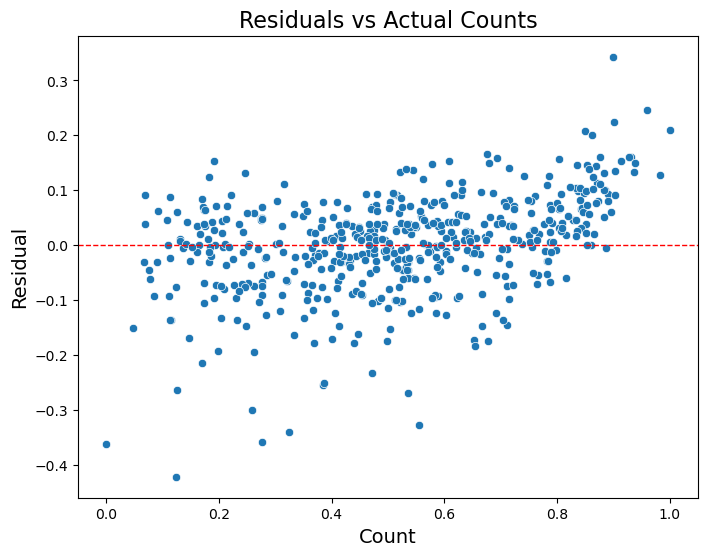

In [69]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=residual)
plt.axhline(y=0, color='red', linewidth=1, linestyle='--')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Residuals vs Actual Counts', fontsize=16)
plt.show()



From the above plot of residuals we can not see any visible pattern.

Durbin-Watson value of final model lr_5 is 2.083, which signifies there is no autocorrelation.

# Making Predictions Using the Final Model

So we have finally fitted the model and checked the normality assumptions of the error terms. Now it's time to make predictions using the final model i.e. the 5th Model.

In [70]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test['cnt']
X_test = df_test.drop(['cnt'],axis=1)


In [74]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [75]:
y_pred = lr_5.predict(X_test_lm_5)

In [76]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8063

# Model Evaluation

Now let's create a visualization to compare the actual values with the predicted values

Text(0, 0.5, 'Predicted (y_pred)')

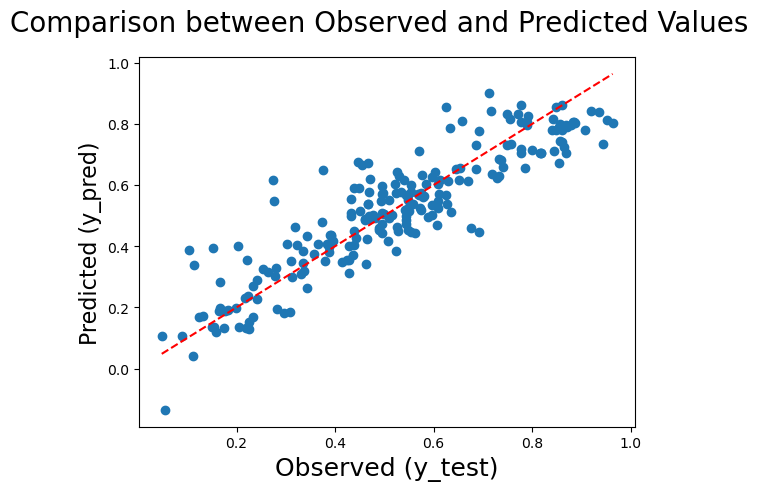

In [77]:
#Visualizing the Relationship between y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
fig.suptitle('Comparison between Observed and Predicted Values', fontsize=20)
plt.xlabel('Observed (y_test)', fontsize=18)
plt.ylabel('Predicted (y_pred)', fontsize=16)

In [78]:
round(lr_5.params,4)

const             0.1406
yr                0.2344
workingday        0.0555
temp              0.4796
windspeed        -0.1500
sep               0.0873
sat               0.0667
Light_snowrain   -0.2893
Misty            -0.0804
spring           -0.0554
summer            0.0626
winter            0.0958
dtype: float64

Hence the equation of our best fitted model is :
    
    cnt = 0.01406 + 0.2344 x yr + 0.0555 x workingday + 0.4796 x temp - 0.1500 x windspeed + 0.0873 x sep + 0.0667 x sat - 0.2893 x Light_snowrain - 0.0804 x Misty - 0.0554 x spring + 0.0626 x summer + 0.0958 x winter

In [79]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


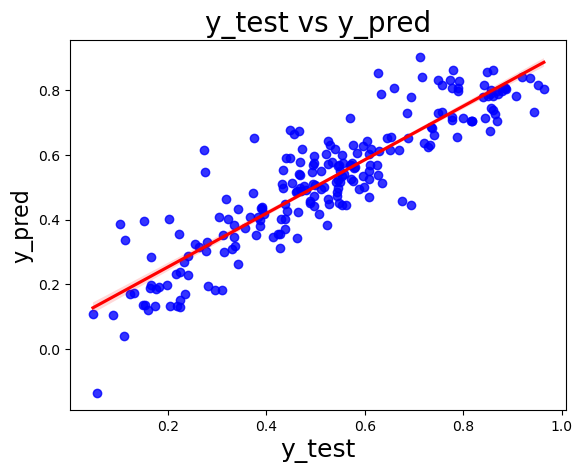

In [80]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision Between Training and Testing Dataset 


Training Data R^2 value = 0.838

Training Data Adjusted R^2 value = 0.834

Testing Data R^2 value = 0.8063

Testing Data Adjusted R^2 value = 0.7961 


# Conclusion

Demand of bikes depend on yr,temp, windspeed, sep, Light_snowrain, sat, workingday, Misty, spring, summer and winter.

# Interpretation of Results

Analyzing the above model, the company should focus on the following strategic factors-

  1) The company should focus on the business expansion during the spring season.Focusing on expanding business efforts during the spring season seems to be a favorable time for drawing in a larger user base.
  2) The company should focus on the business expansion during the month september.More attractive offers during this month can take the company to be a peak period for business.
  3) During the Light snow or Rain, the bookings are expected to be lower, and  the company use this time for maintainance activities without having business impact.
  4) Based on the previous data it is expected to have a increase in numbers of users once the situation cames back to normal compared to 2019.